# Act Report

---

## We rate dogs (arquivos Tweeter)


### Desafio


Baseado nos dados recebidos, entrego um produto melhorado e atualizado.


O produto não está perfeito. No entanto, serve de incentivo a novos colaboradores para que melhorias continuem a ser implementadas.

---

### Intuição


Cães fofos todo mundo retwita. E aqueles **feios**?

---

Exemplo de um cão **muito muito fofo**:

![Foto 1: um cão bem fofo](foto1.jpg)

---

## Parte II - Exibição de alguns resultados

### Implantação

Existe um tutorial do **SKlearn** muito bom disponível no Youtube. Ao final do tutorial, existe um pequeno trabalho com o recorte em fatias e a visualização de alguns dados sobre **qualidade de vinhos**. As ferramentas utilizadas foram basicamente **Pandas** e **Seaborn**. O tutorial encontra-se [aqui](https://www.youtube.com/watch?v=0Lt9w-BxKFQ)

Eu não possuo quase nenhuma experiência em **Seaborn**. No entanto, como a sintaxe dele é muito prática e compativel com os trabalhos realizados em **Pandas**, resolvi experimentar!

Parece ser muito divertido separar cães em basicamente três grupos:

- bem classificados (algo como notas e 8 a 14)

- medianamente classificados (notas de 5 a 7)

- mal classificados (notas de 0 a 4)

E pensando bem, provavelmente cães fofinhos e **bem classificados** devem ser alvo de maior número de retuitagem e de favoritagem... mas será que é só isso?

E se cães **mal classificados** também forem **nasty** e bem retuitados e e favoritados? Como será que isso ficaria em gráfico?

---

### Desafio

Para não me perder, vou seguir basicamente os mesmos passos do tutor no vídeo indicado. A maioria do trabalho dele é em outras ferramentas mais avançadas, no **sklearn**. Este exercício mais singelo aparece ao final, lá pelos dois minutos finais do vídeo... (mais precisamente, em 43:12)

*segundo o Domingão do Faustão, **se vira nos 30!** e como diria Raul Seixas, **quem não tem colírio, usa óculos escuros**... então é isso, melhor seguir os passos de alguém a se perder!* 

In [1]:
import pandas as pd
import seaborn as sns

In [12]:
dfiniciallimpo2 = pd.read_csv('twitter-archive-enhancedNEW2.csv',
                              sep='\t', encoding='utf-8', index_col='tweet_id')

In [3]:
dfiniciallimpo2.info()
dfiniciallimpo2.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 892420643555336193 to 666020888022790149
Data columns (total 13 columns):
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2077 non-null float64
rating_denominator    2094 non-null int64
name                  1412 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
retweet_count         2092 non-null float64
favorite_count        2092 non-null float64
dtypes: float64(3), int64(1), object(9)
memory usage: 229.0+ KB


,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
tweet_id,,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None,8265.0,37870.0
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None,6107.0,32537.0


Eu pretendo trabalhar apenas dados com todos os campos preenchidos, então para evitar muitas exclusões, eu eliminei do meu novo dataset o **nome** do cão (e que pensando bem, para o que eu quero fazer, seria inútil!)

In [4]:
dfapresenta = dfiniciallimpo2[['rating_numerator', 
                            'retweet_count', 'favorite_count']].dropna(axis=0)
print(dfapresenta.info())
dfapresenta

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 892420643555336193 to 666020888022790149
Data columns (total 3 columns):
rating_numerator    2075 non-null float64
retweet_count       2075 non-null float64
favorite_count      2075 non-null float64
dtypes: float64(3)
memory usage: 64.8 KB
None


,rating_numerator,retweet_count,favorite_count
tweet_id,,,
892420643555336193,13.0,8265.0,37870.0
892177421306343426,13.0,6107.0,32537.0
891815181378084864,12.0,4043.0,24496.0
891689557279858688,13.0,8411.0,41228.0
891327558926688256,12.0,9110.0,39401.0
891087950875897856,13.0,3028.0,19807.0
890971913173991426,13.0,2002.0,11576.0
890729181411237888,13.0,18346.0,63899.0
890609185150312448,13.0,4162.0,27213.0


----

Tudo bem... todo esse trabalho para separar e reclassificar **cães**... isso compensa?

### Motivação:

Cão 14/10, **super hiper fofo**:

![Figura2: um verdadeiro 14/10](Foto2.jpg)

Mais um detalhe, isso não ficará realmente bom se os números não forem convertidos aos seus formatos originais:

In [6]:
import numpy as np

In [7]:
dfapresenta['rating_numerator'] = dfapresenta[
                            'rating_numerator'].astype(np.int64)
dfapresenta['retweet_count'] = dfapresenta[
                            'retweet_count'].astype(np.int64)
dfapresenta['favorite_count'] = dfapresenta[
                            'favorite_count'].astype(np.int64)
dfapresenta.info()
dfapresenta.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 892420643555336193 to 666020888022790149
Data columns (total 3 columns):
rating_numerator    2075 non-null int64
retweet_count       2075 non-null int64
favorite_count      2075 non-null int64
dtypes: int64(3)
memory usage: 64.8 KB


,rating_numerator,retweet_count,favorite_count
tweet_id,,,
892420643555336193,13,8265,37870
892177421306343426,13,6107,32537


---

#### Pausa para o lanche

Agora falta pouco... ei, mais há apenas cães no grupo? E isso aqui, por acaso é uma **foca**?

![Figura3: um focão](Foto3.jpg)

---

### Preprocessamento dos dados

Segundo a documentação do Pandas, tuplas é o melhor para inteiros:

In [8]:
#fatias = (0, 4, 8, 14) #é um corte em inteiros
fatias = pd.IntervalIndex.from_tuples([(0, 4), (5, 7), (8, 14)])
nomesgrupos = ['mal', 'medianamente', 'bem']
fatias

(0, 4, 8, 14)

In [13]:
dfapresenta['rating_numerator']

tweet_id
892420643555336193    13
892177421306343426    13
891815181378084864    12
891689557279858688    13
891327558926688256    12
891087950875897856    13
890971913173991426    13
890729181411237888    13
890609185150312448    13
890240255349198849    14
890006608113172480    13
889880896479866881    13
889665388333682689    13
889638837579907072    12
889531135344209921    13
889278841981685760    13
888917238123831296    12
888804989199671297    13
888554962724278272    13
888078434458587136    12
887705289381826560    13
887517139158093824    14
887473957103951883    13
887343217045368832    13
887101392804085760    12
886983233522544640    13
886736880519319552    13
886680336477933568    13
886366144734445568    12
886258384151887873    13
                      ..
666411507551481857     2
666407126856765440     7
666396247373291520     9
666373753744588802    11
666362758909284353     6
666353288456101888     8
666345417576210432    10
666337882303524864     9
6662939116321341

In [14]:
dfapresenta['rating_numerator'] = pd.cut(dfapresenta['rating_numerator'], 
                                         bins=fatias, 
                                         labels=nomesgrupos)
#dfapresenta['rating_numerator'].unique()
dfapresenta['rating_numerator']

tweet_id
892420643555336193             bem
892177421306343426             bem
891815181378084864             bem
891689557279858688             bem
891327558926688256             bem
891087950875897856             bem
890971913173991426             bem
890729181411237888             bem
890609185150312448             bem
890240255349198849             bem
890006608113172480             bem
889880896479866881             bem
889665388333682689             bem
889638837579907072             bem
889531135344209921             bem
889278841981685760             bem
888917238123831296             bem
888804989199671297             bem
888554962724278272             bem
888078434458587136             bem
887705289381826560             bem
887517139158093824             bem
887473957103951883             bem
887343217045368832             bem
887101392804085760             bem
886983233522544640             bem
886736880519319552             bem
886680336477933568             bem
88636614473

In [17]:
dfapresenta

,rating_numerator,retweet_count,favorite_count
tweet_id,,,
892420643555336193,bem,8265,37870
892177421306343426,bem,6107,32537
891815181378084864,bem,4043,24496
891689557279858688,bem,8411,41228
891327558926688256,bem,9110,39401
891087950875897856,bem,3028,19807
890971913173991426,bem,2002,11576
890729181411237888,bem,18346,63899
890609185150312448,bem,4162,27213


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

---

### Comentários 

Cães com **ótimas notas** (bem pontuados) serem muito mais frequentemente retwitados é algo já esperado... mas surpresa! As pessos tendem a retwitar também cães **mal pontuados** (as fotos podem ser realmente engraçadas!):

Favoritar um cão bem pontuado, todo fofinho... é bastante **comum** pelo visto. Pessoalmente, imaginei que cães mal pontuados talvez fossem mais favoritados do que os cães da média... não foi o que ocorreu, mas tudo bem! Gráficos nos mostram coisas que às vezes dados não condensados não conseguem nos apresentar direito...

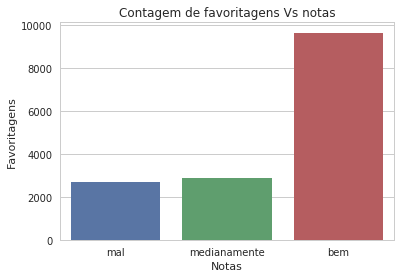

In [46]:
sns.set(style="whitegrid")

ax = sns.barplot(x="rating_numerator", y="favorite_count", 
                 data=dfapresenta, ci=None)
ax.set_title("Contagem de favoritagens Vs notas")
ax.set_xlabel('Notas')
ax.set_ylabel('Favoritagens')
plt.show()

---

Tanto trabalho... mas afinal, o que é um cão **nasty**?

Foi difícil, encontrei um legítimo 1/10... espere... mas isso é **mesmo** um cão?

![Figura3: isso é cão?](Foto4.jpg)

*Afinal entendi o porquê os cães mal classificados não serem um **estouro em vendas**... normalmente tratam-se de outros animais disfarçados na postura de um cão!*

*Quem em um grupo de **cães** irá querer retwitar um **bode**?* 

---

### Uma observação final sobre o projeto

Sofri um bocado para colocar essas coisas no lugar. Levei mais tempo do que esperava e pensei que não fosse dar conta do projeto.

Depois percebi que estava emperrando em alguns defeitos conceituais da minha parte no **Pandas**. Correu tudo bem e aprendi muitas coisas. A ferramenta **SQL** é ótima e muito eficiente para algumas tarefas (consultas e reparos de dados em lote), mas não é muito eficiente em tarefas especializadas (como aquele meu filtro de nome do cão em um texto). Então valeu à pena brigar com o **Pandas**!

O que será daqui para frente? Vou implantar a ferramenta **Pandas** + **Jupyter Notebook** para diversas coisas que fazemos aqui na ANA (Agência Nacional de Águas)

Nota final:

- inicialmente achei super estranho, um banco chamado **We Rate Dogs**?

- nunca havia usado Twitter. Abri minha conta e adicionei o grupo

- realmente foi um projeto muito, mas muito **fofinho**! Posso dizer que no final, simplesmente **amei**!

*Mais uma nota: por favor evitem nos próximos projetos usarem temas pesados como o **Cancer Data**. Tive muitos familiares mortos deste mal e é um pouco traumatizante. Acaba não sendo divertido fazer exercícios do tipo: qual a probabilidade de você ter **câncer**, dado que fez um teste e deu **positivo**...*